In [61]:
include("model.jl")
include("Parser.jl")
include("proximal.jl")
include("tabu.jl")
include("utils.jl")

using JuMP

In [62]:
data, x_VC, y_VC, x_loc, y_loc, R = parse_to_struct("./Instances/coord100-5-1_processed.dat")

(OptVaxData(100, 5, [0.0 14.866068747318506 … 22.20360331117452 41.773197148410844; 14.866068747318506 0.0 … 23.021728866442675 37.12142238654117; … ; 22.20360331117452 23.021728866442675 … 0.0 20.591260281974; 41.773197148410844 37.12142238654117 … 20.591260281974 0.0], [0 0 … 0 0; 1 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], 70, [770, 700, 770, 770, 770], [18, 17, 14, 11, 15, 16, 11, 12, 14, 19  …  20, 15, 15, 15, 14, 17, 20, 18, 19, 18], [41688, 45698, 45977, 52810, 45504], 1000, 51654.68682035706, [60, 38, 19, 88, 81, 65, 75, 29, 27, 63], 10), [1.0, 46.0, 2.0, 13.0, 3.0], [13.0, 4.0, 3.0, 19.0, 37.0], [31.0, 36.0, 9.0, 47.0, 28.0, 38.0, 41.0, 36.0, 4.0, 43.0  …  35.0, 1.0, 17.0, 20.0, 46.0, 9.0, 45.0, 45.0, 50.0, 38.0], [6.0, 20.0, 19.0, 42.0, 20.0, 43.0, 4.0, 30.0, 10.0, 16.0  …  9.0, 11.0, 34.0, 42.0, 30.0, 43.0, 8.0, 31.0, 37.0, 39.0], [17.221616088334976, 16.924140933015536, 19.096494113285, 12.786643814952267, 16.736155506578182])

In [63]:
(best_VC, best_MMTs, best_cost, best_Q) = tabu_search(data, alpha = 10.0)

Is feasible: true

(1, [[(101, 60), (60, 88), (88, 75), (75, 101)], [(101, 63), (63, 65), (65, 27), (27, 38), (38, 101)], [(101, 78), (78, 33), (33, 41), (41, 18), (18, 101)], [(101, 71), (71, 50), (50, 24), (24, 43), (43, 101)], [(101, 20), (20, 70), (70, 64), (64, 61), (61, 101)], [(101, 44), (44, 39), (39, 76), (76, 7), (7, 1), (1, 101)], [(101, 6), (6, 80), (80, 83), (83, 11), (11, 101)], [(101, 84), (84, 22), (22, 42), (42, 19), (19, 101)], [(101, 100), (100, 62), (62, 23), (23, 68), (68, 35), (35, 101)]], 69.2296685867941, 787.0)

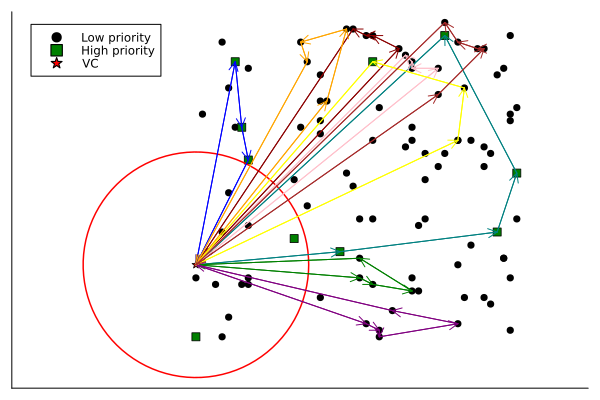

In [64]:
plot_solution_greedy(best_MMTs, x_VC, y_VC, x_loc, y_loc, R, data)

In [ ]:
println("====================================")
println("z_low = ", best_Q)
println("====================================")

z_star = 256.0


In [39]:
z_dual = proximal_gradient_descent(
                    best_Q,
                    data,
                    50,)

Proximal gradient descent   6%|█▌                        |  ETA: 0:01:02

InterruptException: InterruptException:

In [9]:
println("====================================")
println("z_dual = ", z_dual)
println("====================================")

z_dual = 286.002720578172
